In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from gd import gradient_descent, newton_raphson
from kmeans import kmeans
from metrics import clustering_accuracy
# from hessian import distance_grad_hessian, newton_raphson 

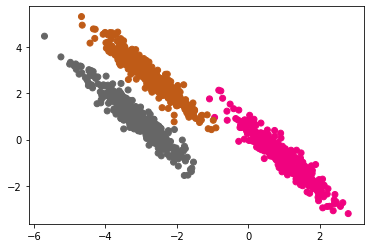

In [2]:
random_state = 170
n_samples = 1000
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], color=plt.cm.Accent_r(y))
plt.show()

standard kmeans
[[-2.52719295  0.79702544]
 [-3.30337783  2.88700078]
 [ 1.04187268 -0.86773199]]
accuracy 0.813


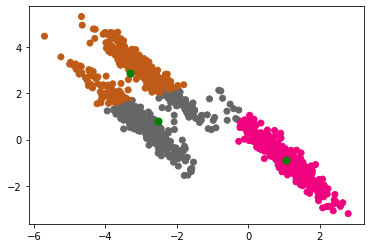

In [12]:
print("standard kmeans")
model = KMeans(n_clusters=3).fit(X_aniso)
assign = model.labels_
std_centers = model.cluster_centers_
print(std_centers)

acc = clustering_accuracy(y, assign)
print("accuracy %.3f"%acc)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], color=plt.cm.Accent_r(assign))
plt.scatter(std_centers[:, 0], std_centers[:, 1], color='g', s=50)
plt.show()

gradient descent method
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
[[-3.01617062  0.88681771]
 [ 1.01066018 -0.82013906]
 [-2.90176014  2.83320752]]
average dist 0.958 accuray 0.925


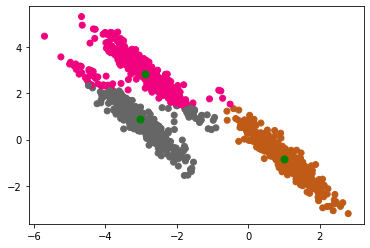

In [15]:
# find 3 clusters, p=2

print("gradient descent method")
gd_centers, gd_dist, assign = kmeans(X_aniso, 3, 2, method='gd')
# the returned distance is the average distance from a point to its centroid
print(gd_centers)

acc = clustering_accuracy(y, assign)
print("average dist %.3f accuray %.3f" %( gd_dist, acc) )

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], color=plt.cm.Accent_r(assign))
plt.scatter(gd_centers[:, 0], gd_centers[:, 1], color='g', s=50)
plt.show()

newton raphson method
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
[[-2.8657805   2.81320249]
 [ 0.99152567 -0.80212502]
 [-3.01372419  0.85521374]]
average dist 0.958 accuray 0.928


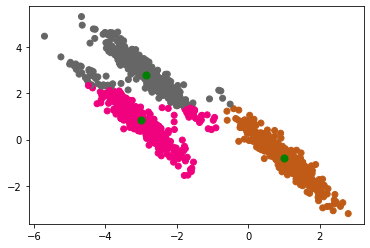

In [19]:
# find 3 clusters, p=2

print("newton raphson method")
nr_centers, nr_dist, assign = kmeans(X_aniso, 3, 2, method='nr') 
print(nr_centers)

acc = clustering_accuracy(y, assign)
print("average dist %.3f accuray %.3f" %( nr_dist, acc) )

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], color=plt.cm.Accent_r(assign))
plt.scatter(nr_centers[:, 0], nr_centers[:, 1], color='g', s=50)
plt.show()